<a href="https://colab.research.google.com/github/roulupen/EVAAssignments/blob/master/Assignment4/Assignment4_First.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### This file contains a very basic model and here I have make sure the number of parametrs less than 15k.  In subsequent files I will add diiferent model tuning paramters and will try to achieve the accuracy target with much lesser parameter.

### Importing Keras library 

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


### Importing other required library

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


### Displaying the first image from the dataset

(60000, 28, 28)


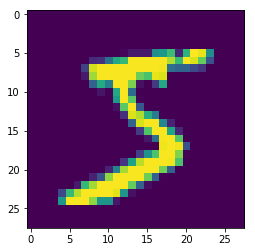

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

### Reshaping the train test dataset by defining number of channel for the input image

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Normalizing the train and test data set by dividing 255, as 255 is the maximum value for a channel in an image and minimum is 0

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### displaying last 10 values from the output of train dataset

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### As this is a classification problem with 10 labels(0-9 numbers), so here we are converting the labels into hot encoding to use in the model prediction

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### Displying the last 10 values from the output of train dataset after hot encoding

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## 1st Model
## Less than 15k paramter and target validation accuracy > 99.4%

### Model defination
#### This is a very simple model, along with convultion layer I have added 1x1 convolution and Maxpooling

In [10]:
from keras.layers import Activation, MaxPooling2D, Dropout
model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26x26x10
model.add(Convolution2D(16, 3, 3, activation='relu')) # 26x26x10 -> (3x3x10) x 20 -> 24x24x20
model.add(Convolution2D(32, 3, 3, activation='relu')) # 26x26x20 -> (3x3x20) x 30 -> 22x22x30

model.add(MaxPooling2D(pool_size=(2, 2))) # 11x11x30
model.add(Convolution2D(10, 1, activation='relu')) # 11x11x30 -> (1x1x32) x10 -> 11 x 11 x 10

model.add(Convolution2D(10, 3, 3, activation='relu')) # 11x11x10 => (3x3x10) x 16 => 9x9x16
model.add(Convolution2D(20, 3, 3, activation='relu')) # 9x9x32 => (3x3x16) x 32 => 7x7x32
model.add(Convolution2D(10, 1, activation='relu')) # 7x7x32 => (1x1x32) x 10 => 7x7x10

model.add(Convolution2D(10, 7)) # 7x7x10 => (7x7x10) => 1x1x10
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  if sys.path[0] == '':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 10)        330       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 10)          910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 20)          1820      
__________

#### Displaying model summary 

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 10)        330       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 10)          910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 20)          1820      
__________

#### Compile the model

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#### Train the model

In [13]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
checkpointer = ModelCheckpoint(filepath='assignment4_model_1.h5', verbose = 1, save_best_only=True, monitor='val_acc', mode='max')

model.fit(X_train, Y_train, batch_size=64, nb_epoch=25, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpointer])

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 11s 183us/step - loss: 0.2473 - acc: 0.9239 - val_loss: 0.0888 - val_acc: 0.9726

Epoch 00001: val_acc improved from -inf to 0.97260, saving model to assignment4_model_1.h5
Epoch 2/25
60000/60000 [==============================] - 6s 99us/step - loss: 0.0921 - acc: 0.9723 - val_loss: 0.0651 - val_acc: 0.9783

Epoch 00002: val_acc improved from 0.97260 to 0.97830, saving model to assignment4_model_1.h5
Epoch 3/25
60000/60000 [==============================] - 5s 91us/step - loss: 0.0663 - acc: 0.9797 - val_loss: 0.0516 - val_acc: 0.9833

Epoch 00003: val_acc improved from 0.97830 to 0.98330, saving model to assignment4_model_1.h5
Epoch 4/25
60000/60000 [==============================] - 5s 91us/step - loss: 0.0549 - acc: 0.9831 - val_loss: 0.0617 - val_acc: 0.9816

Epoch 00004: val_acc did not improve from 0.98330
Epoch 5/25
60000/60000 [==============================] - 5s 91us/s

In [0]:
# Load the weights with the best validation accuracy:
model.load_weights('assignment4_model_1.h5')

#### Validate the model accuracy with test data

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

#### Printing the validation accuracy

In [16]:
print(score)

[0.041711725946849035, 0.9881]


### Predicting the test data outout using the model

In [0]:
y_pred = model.predict(X_test)

### Printing last 10 predicted(probability like) vs actual output 

In [18]:
print(y_pred[:9])
print(y_test[:9])

[[8.7380125e-13 1.3578150e-11 9.8621115e-07 2.1520790e-08 7.6609901e-19
  8.2407657e-12 2.8441646e-20 9.9999905e-01 3.0569741e-10 2.0853801e-09]
 [1.9961444e-11 2.0320558e-10 1.0000000e+00 3.4850564e-10 3.9495720e-12
  3.1834277e-16 1.4099619e-12 2.2198086e-14 3.9581825e-13 1.3395204e-17]
 [1.0349430e-08 9.9998391e-01 1.6183485e-06 1.7058893e-09 1.8098475e-06
  5.5863775e-06 3.2126675e-08 5.9253371e-06 9.7644374e-07 9.8821900e-08]
 [9.9980444e-01 9.1597980e-14 1.3820970e-05 3.4092176e-12 3.4432963e-09
  8.0177927e-09 8.5166917e-05 1.2255880e-09 3.5360395e-07 9.6152071e-05]
 [5.3504527e-11 1.2513841e-12 1.1354158e-11 3.0552758e-13 9.9998271e-01
  5.6431850e-13 2.0885793e-12 2.5553702e-13 1.4209797e-08 1.7277251e-05]
 [5.9548544e-10 9.9995780e-01 1.5039931e-06 2.0441331e-10 8.3394389e-06
  7.3140917e-08 1.5571165e-09 3.1413674e-05 1.6734076e-07 6.5042730e-07]
 [2.2110546e-20 7.8387965e-12 3.3912970e-11 5.2089313e-16 9.9999988e-01
  1.2173417e-13 4.2381562e-18 6.1408629e-09 1.1032738e-07 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [20]:
layer_dict

{'activation_1': <keras.layers.core.Activation at 0x7fd6c58c6b00>,
 'conv2d_1': <keras.layers.convolutional.Conv2D at 0x7fd6c8a108d0>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x7fd6c61dd1d0>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x7fd6c61dd518>,
 'conv2d_4': <keras.layers.convolutional.Conv2D at 0x7fd6c61dd630>,
 'conv2d_5': <keras.layers.convolutional.Conv2D at 0x7fd6c592b160>,
 'conv2d_6': <keras.layers.convolutional.Conv2D at 0x7fd6c5941a20>,
 'conv2d_7': <keras.layers.convolutional.Conv2D at 0x7fd6c5955358>,
 'conv2d_8': <keras.layers.convolutional.Conv2D at 0x7fd6c58ea3c8>,
 'flatten_1': <keras.layers.core.Flatten at 0x7fd6c58c6e48>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x7fd6c592b940>}

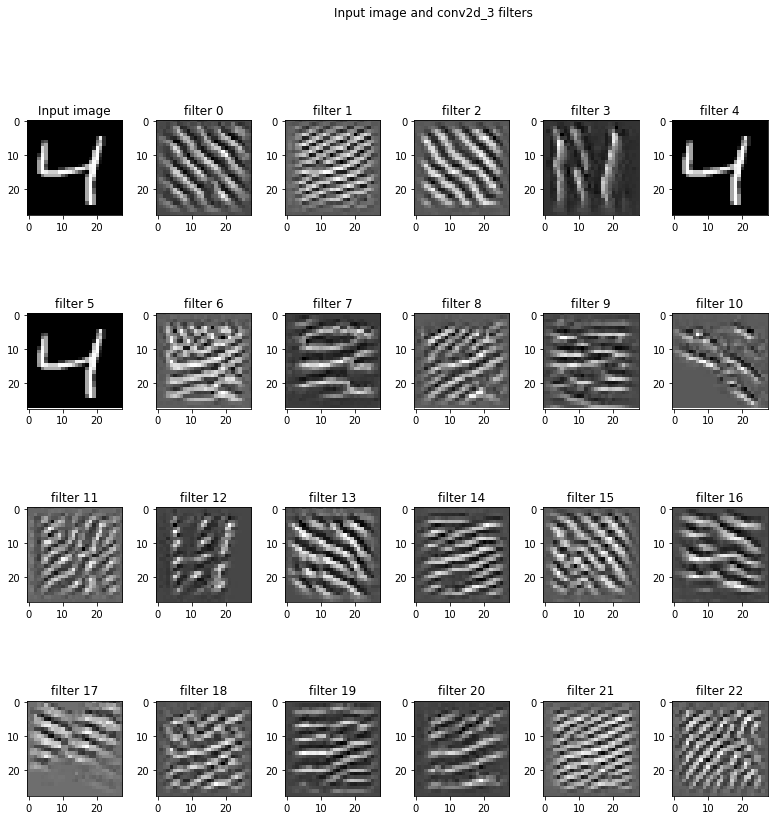

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_3'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()